<a href="https://colab.research.google.com/github/leeh8911/Deep_Learning_from_Scratch_Study/blob/master/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

import sys, os
os.chdir("/content/gdrive/My Drive/github/deep-learning-from-scratch/ch04")
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

import numpy as np
import matplotlib.pylab as plt

print("env setting finished!")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
env setting finished!


In [0]:
# functions
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)       
    
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))/batch_size

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h))/(2*h)

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2)/(2*h)
    return grad

def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= grad*lr
        
    return x

0.1999999999990898
0.2999999999986347


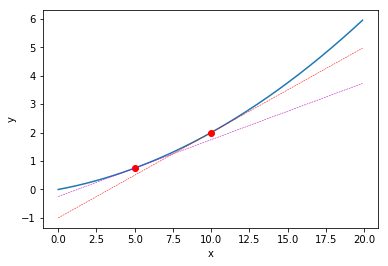

In [75]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

def function_2(x):
    return x[0]**2 + x[1]**2

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

x1 = 5
y1 = function_1(x1)
m1 = numerical_diff(function_1, x1)
x2 = 10
y2 = function_1(x2)
m2 = numerical_diff(function_1, x2)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.plot(x1, y1, 'or')
plt.plot(x2, y2, 'or')
plt.plot(x, m1*(x - x1) + y1, '--m', linewidth = .5)
plt.plot(x, m2*(x - x2) + y2, '--r', linewidth = .5)
plt.show

print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

In [76]:
# test mean_square_error function
t1 = [0,0,1,0,0,0,0,0,0,0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(np.array(t1).shape)
print(np.array(y1).shape)
print(np.array(y2).shape)
mse_1 = mean_squared_error(np.array(y1), np.array(t1))
mse_2 = mean_squared_error(np.array(y2), np.array(t1))
print(mse_1, mse_2)

cee_1 = cross_entropy_error(np.array(y1), np.array(t1))
cee_2 = cross_entropy_error(np.array(y2), np.array(t1))
print(cee_1, cee_2)

(10,)
(10,)
(10,)
0.09750000000000003 0.5975
0.510825457099338 2.302584092994546


In [77]:
# mini batch learning
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,10)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

(60000, 784)
(60000, 10)


In [78]:
# test gradient functions

grad1_f2 = numerical_gradient(function_2, np.array([3.0, 4.0]))
grad2_f2 = numerical_gradient(function_2, np.array([0.0, 2.0]))
grad3_f2 = numerical_gradient(function_2, np.array([3.0, 0.0]))

print(grad1_f2, np.array([3.0, 4.0]))
print(grad2_f2, np.array([0.0, 2.0]))
print(grad3_f2, np.array([3.0, 0.0]))

init_x = np.array([-3.0, 4.0])
min_x = gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)
print(min_x, function_2(min_x)) 
# i dont know why difference between book and my code answer.... XD
# the book's answer is x is almost zero vector

init_x = np.array([-3.0, 4.0])
min_x = gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100)
print(min_x, function_2(min_x)) 

init_x = np.array([-3.0, 4.0])
min_x = gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100)
print(min_x, function_2(min_x)) 

[6. 8.] [3. 4.]
[0. 4.] [0. 2.]
[6. 0.] [3. 0.]
[-0.0005 -0.0005] 4.999997960937364e-07
[-2.58985795e+13 -1.29524822e+12] 6.724140899951673e+26
[-3.00999994  3.98999992] 24.980199000594027


In [0]:
# simpleNet
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [80]:
# test simpleNet
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p)

t = np.array([0, 0, 1])
l = net.loss(x, t)
print(l)

def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[-2.30758963 -1.45961361  0.53201863]
 [-1.8729761  -1.60650884 -0.94764363]]
[-3.07023227 -2.32162612 -0.53366809]
0.22029078624130743
[[ 0.03809467  0.08053409 -0.11862876]
 [ 0.05714201  0.12080114 -0.17794314]]


In [0]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                weight_init_std = 0.01):
        # initialize weight
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [82]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

x = np.random.rand(100, 784)
y = net.predict(x)

(784, 100)
(100,)
(100, 10)
(10,)


train acc, test acc : 0.09035, 0.0892
train acc, test acc : 0.78345, 0.7868
train acc, test acc : 0.8747333333333334, 0.878
train acc, test acc : 0.8975666666666666, 0.9004
train acc, test acc : 0.9088166666666667, 0.9115
train acc, test acc : 0.9143166666666667, 0.9175
train acc, test acc : 0.9202666666666667, 0.9213
train acc, test acc : 0.9244166666666667, 0.9244
train acc, test acc : 0.9287, 0.9291
train acc, test acc : 0.9309833333333334, 0.9309
train acc, test acc : 0.9340166666666667, 0.9316
train acc, test acc : 0.9358166666666666, 0.9355
train acc, test acc : 0.9398833333333333, 0.9378
train acc, test acc : 0.9408166666666666, 0.9402
train acc, test acc : 0.9430166666666666, 0.9401
train acc, test acc : 0.94505, 0.9423
train acc, test acc : 0.9470166666666666, 0.9428


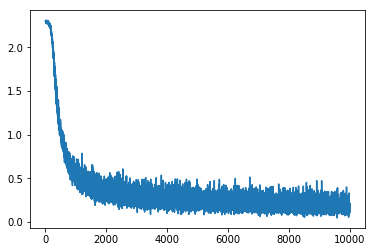

In [88]:
# implementation of mini batch learning
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# Hyperparameters
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(train_size/batch_size, 1)
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
#     grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc : " + str(train_acc) + ", " + str(test_acc))
        
plt.plot(train_loss_list)

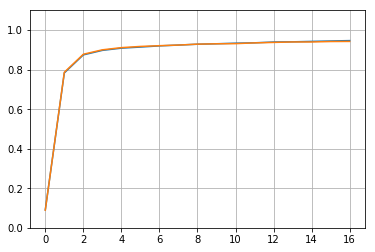

In [92]:
plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.ylim([0.0, 1.1])
plt.grid(True)